`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


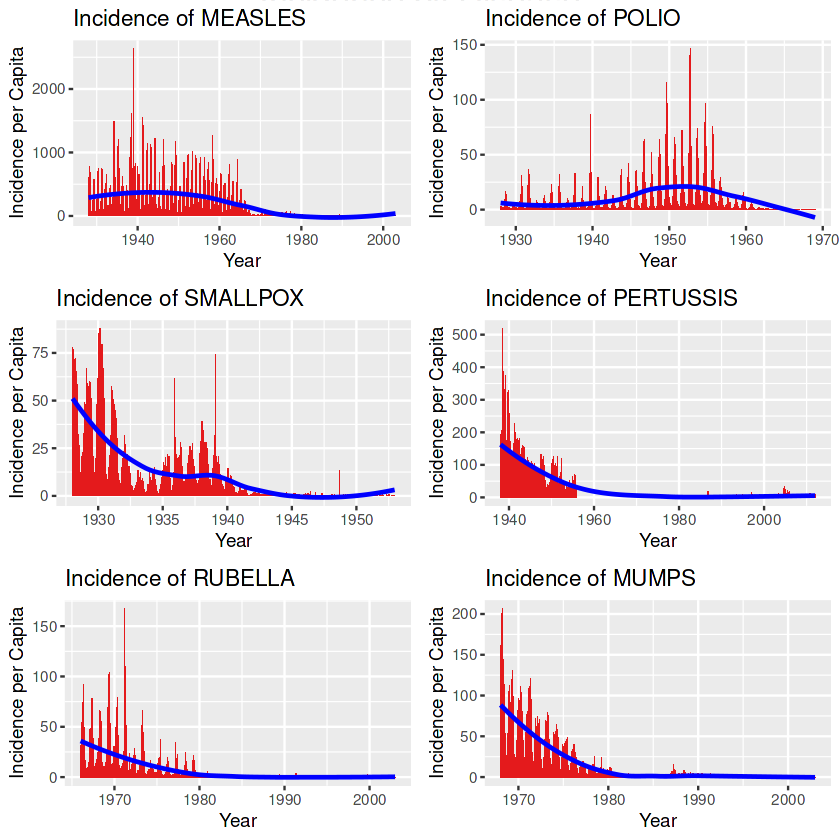

In [8]:
library(ggplot2)
library(readr)
library(cowplot)

# Define a list of diseases
listFichier <- c("measles", "mumps", "pertussis", "polio", "rubella", "smallpox")

# Initialize an empty data frame
data <- data.frame()

# Read and combine data from multiple CSV files
for (i in listFichier) {
  data_i <- read.csv(paste("../input/", i, ".csv", sep = ""))
  data <- rbind(data, data_i)
}

# Calculate 'year' and 'weekNb'
data$year <- floor(data$week / 100)
data$weekNb <- data$week - data$year * 100

# Calculate 'tempsContinue'
data$tempsContinue <- as.numeric(data$year) + as.numeric(data$weekNb) / 52

# Aggregate data
toPlot <- aggregate(incidence_per_capita ~ tempsContinue + disease, data = data, FUN = sum)

# Sort by 'tempsContinue'
toPlot <- toPlot[order(toPlot$tempsContinue), ]

# Create a list of unique diseases
unique_diseases <- unique(toPlot$disease)

# Define plot dimensions
nrow_plots <- ceiling(length(unique_diseases) / 2)
ncol_plots <- 2

# Create a list of ggplot objects for each disease
plot_list <- lapply(unique_diseases, function(disease) {
  # Suppress warnings for smoothing lines
  suppressWarnings({
    p <- ggplot(toPlot[toPlot$disease == disease, ], aes(x = tempsContinue, y = incidence_per_capita, fill = disease)) +
      geom_bar(stat = "identity") +
      geom_smooth(se = FALSE, method = "loess", color = "blue", linewidth = 1) +  # Add a smoother line
      scale_fill_brewer(palette = "Set1") +  # Use different colors
      labs(x = "Year", y = "Incidence per Capita") +  # Axis labels
      ggtitle(paste("Incidence of", disease)) +  # Title for each plot
      theme(legend.position = "none")
    p
  })
})

plot_width <- 100  # Adjust the width as needed
plot_height <- 100  # Adjust the height as needed

# Create a common title for all plots
common_title <- ggdraw() +
  draw_label("Incidence by Disease", size = 20, hjust = 0.5)

# Create a grid of plots with adjusted dimensions
multiplot <- plot_grid(plotlist = plot_list, nrow = nrow_plots, ncol = ncol_plots, 
                       rel_widths = rep(plot_width, ncol_plots), rel_heights = rep(plot_height, nrow_plots))

# Adjust the dimensions of the final plot
final_plot <- plot_grid(common_title, multiplot, ncol = 1, rel_heights = c(0.1, nrow_plots * plot_height))

# Display the final plot
ggsave("final_plot.png", final_plot, width = 40, height = 20, units = "in")


# Display the final plot
print(final_plot)


In [9]:
summary(data)

      week           state            state_name          disease         
 Min.   :192801   Length:509645      Length:509645      Length:509645     
 1st Qu.:194343   Class :character   Class :character   Class :character  
 Median :196417   Mode  :character   Mode  :character   Mode  :character  
 Mean   :196443                                                           
 3rd Qu.:198352                                                           
 Max.   :201152                                                           
    cases           incidence_per_capita      year          weekNb     
 Length:509645      Min.   :  0.000      Min.   :1928   Min.   : 1.00  
 Class :character   1st Qu.:  0.000      1st Qu.:1943   1st Qu.:16.00  
 Mode  :character   Median :  0.050      Median :1964   Median :28.00  
                    Mean   :  1.561      Mean   :1964   Mean   :27.76  
                    3rd Qu.:  0.600      3rd Qu.:1983   3rd Qu.:40.00  
                    Max.   :683.060      Ma

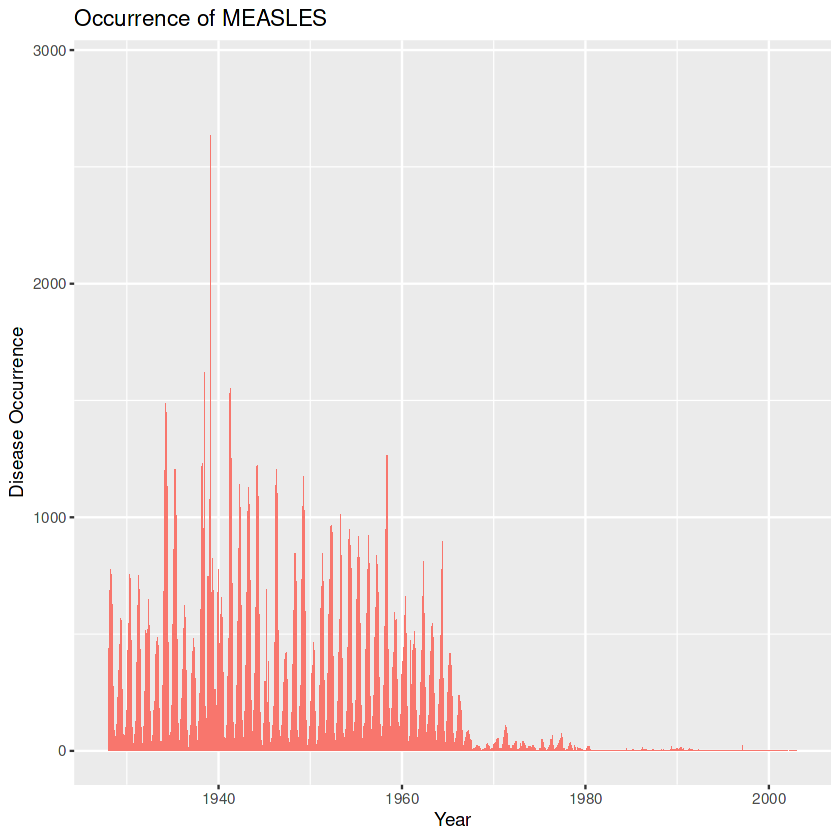

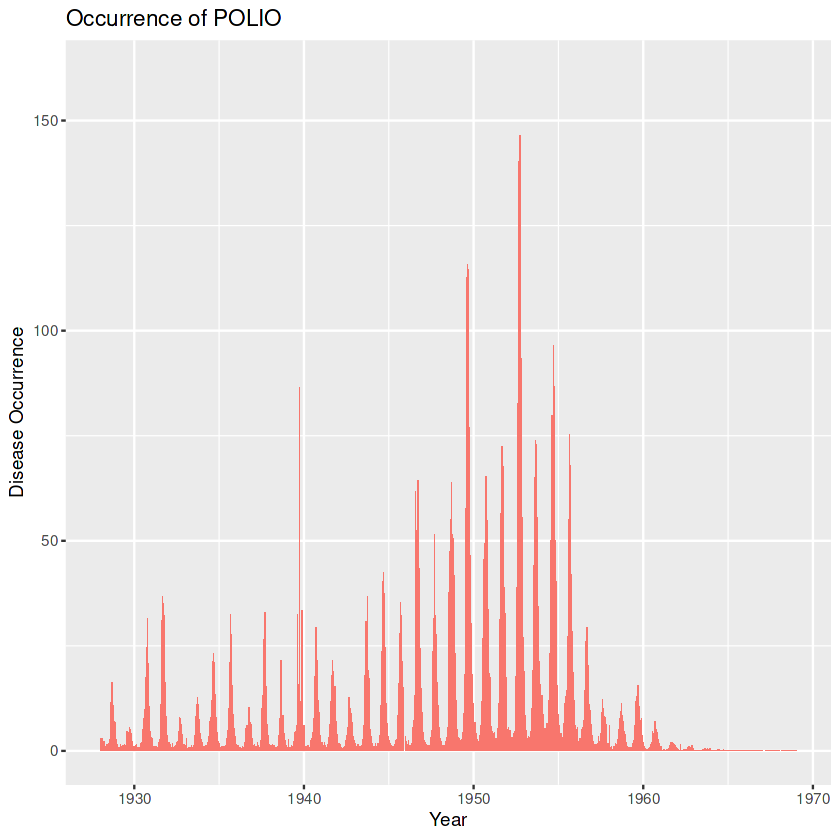

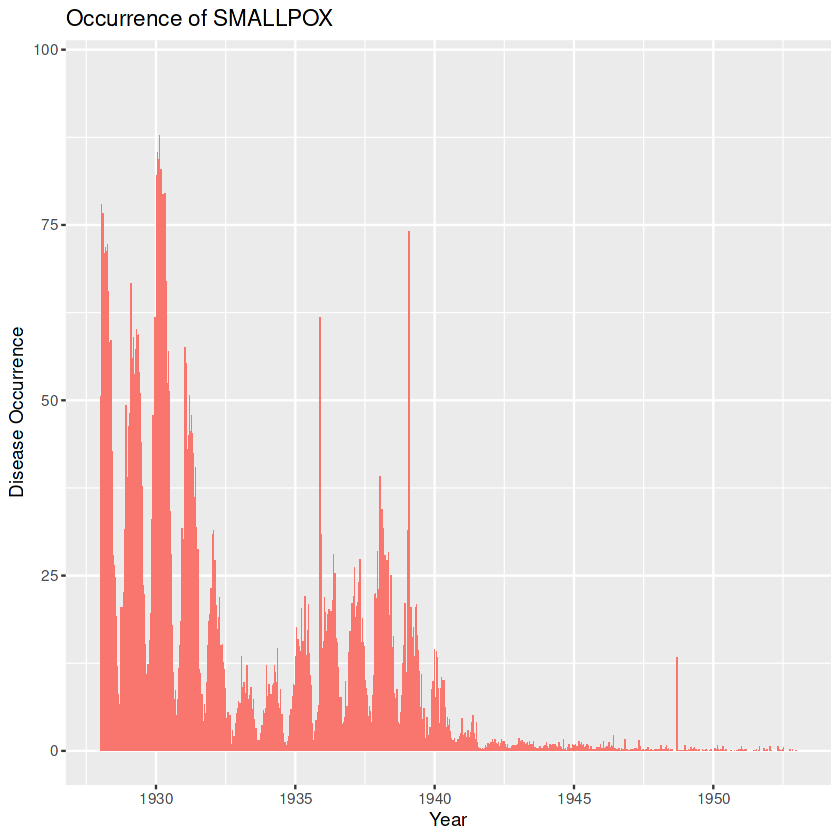

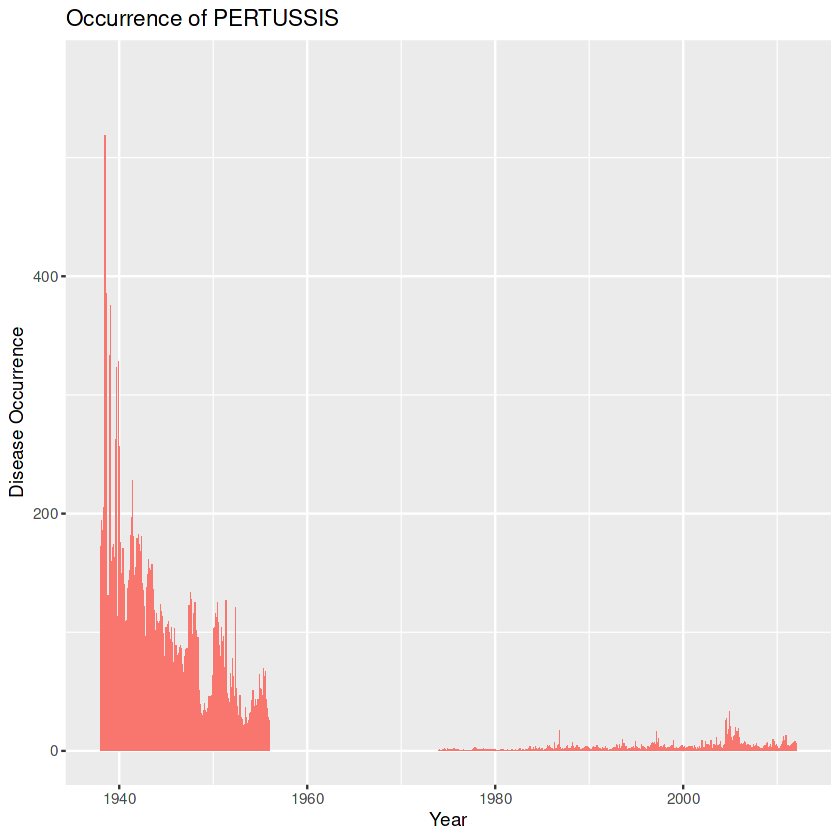

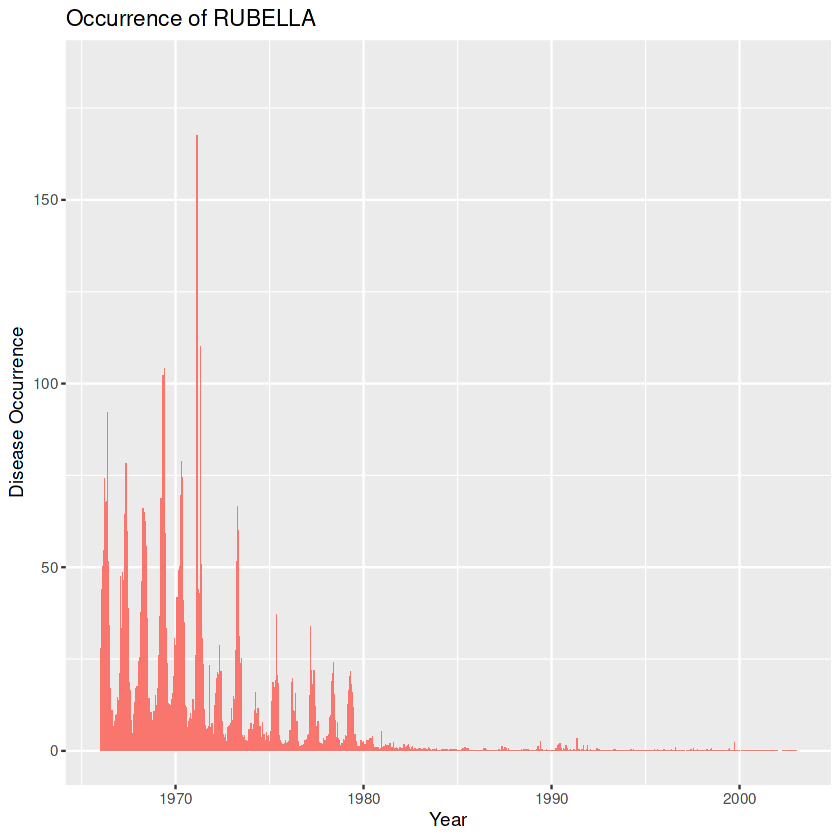

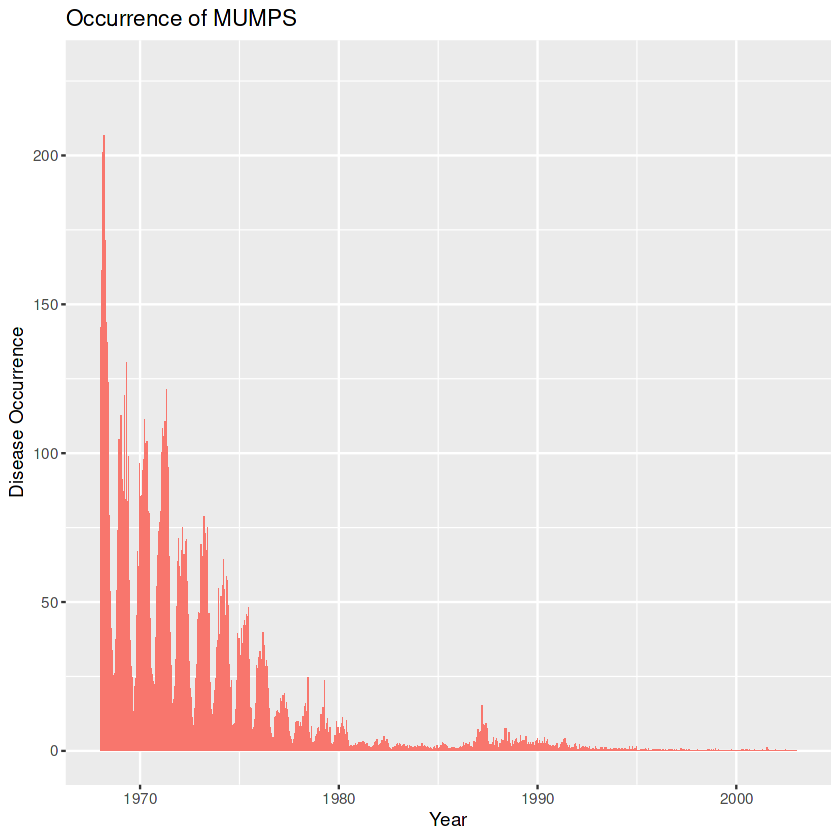

In [10]:
# Define the dimensions for the individual plots
plot_width <- 8  # Adjust the width as needed
plot_height <- 6  # Adjust the height as needed

# Create and display individual plots one after the other
for (disease in unique_diseases) {
  # Subset the data for the current disease
  data_subset <- toPlot[toPlot$disease == disease, ]
  
  # Create a ggplot for the current disease
  p <- ggplot(data_subset, aes(x = tempsContinue, y = incidence_per_capita, fill = disease)) +
    geom_bar(stat = "identity") +
    labs(x = "Year", y = "Disease Occurrence") +  # Axis labels
    ggtitle(paste("Occurrence of", disease)) +  # Title for each plot
    theme(legend.position = "none")
  
  # Calculate dynamic y-axis limit
  max_value <- max(data_subset$incidence_per_capita)
  p <- p + ylim(0, max_value * 1.1)
  
  # Display the plot for the current disease
  print(p)
  
  # Save the plot with customized dimensions
  ggsave(paste("plot_", disease, ".png", sep = ""), plot = p, width = plot_width, height = plot_height)
}

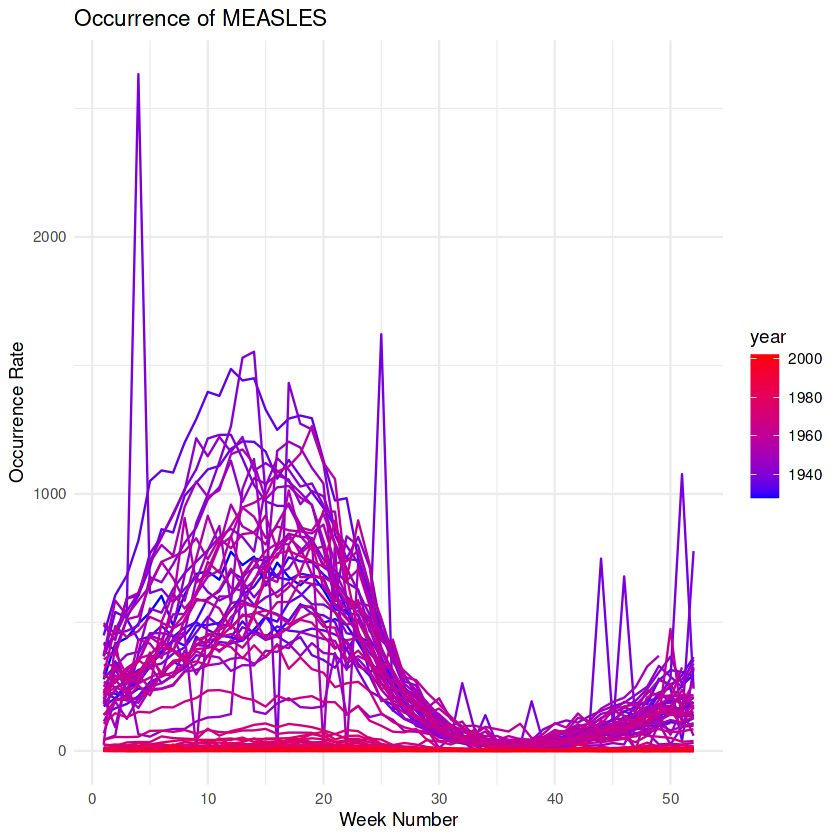

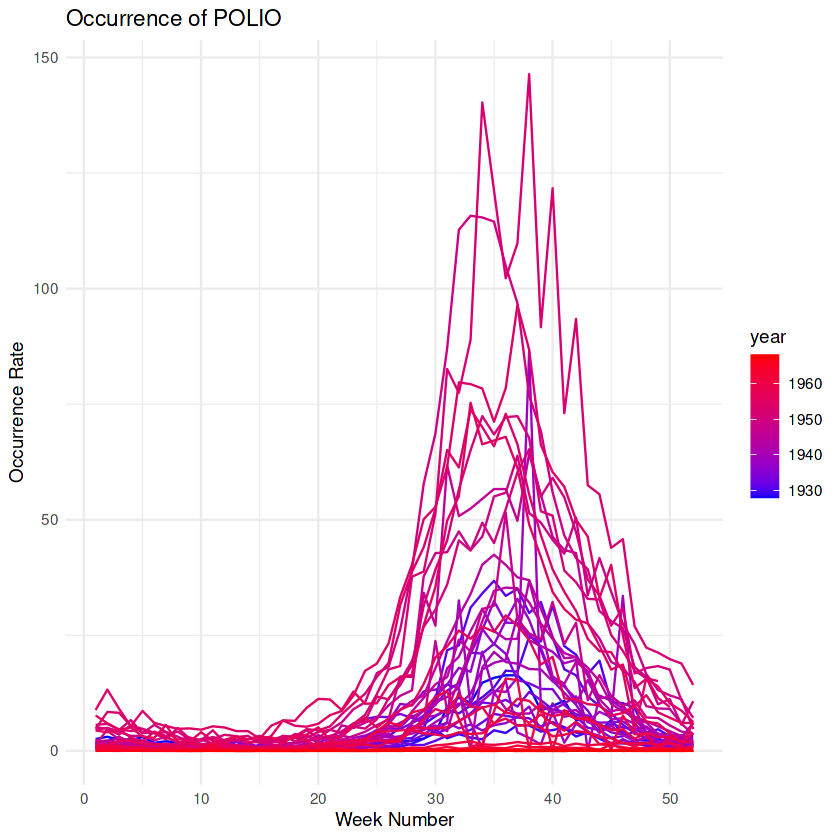

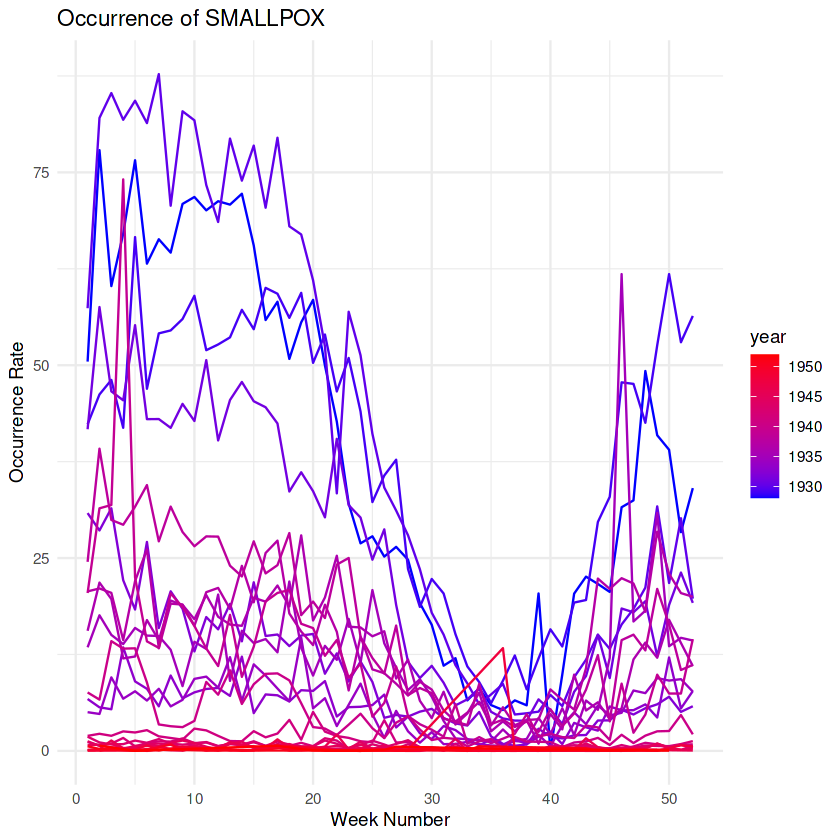

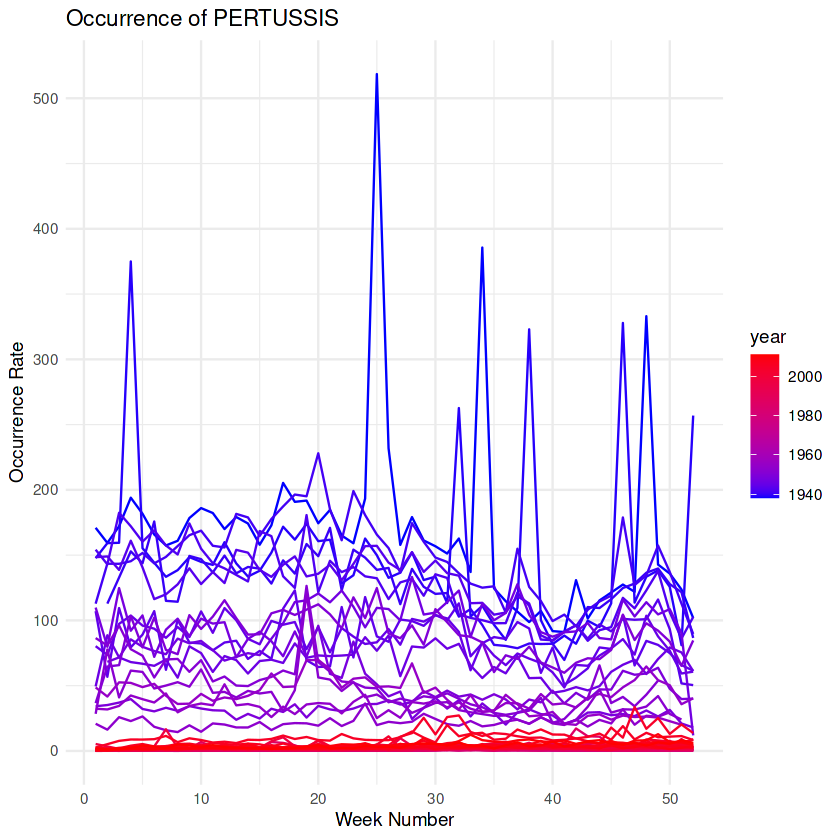

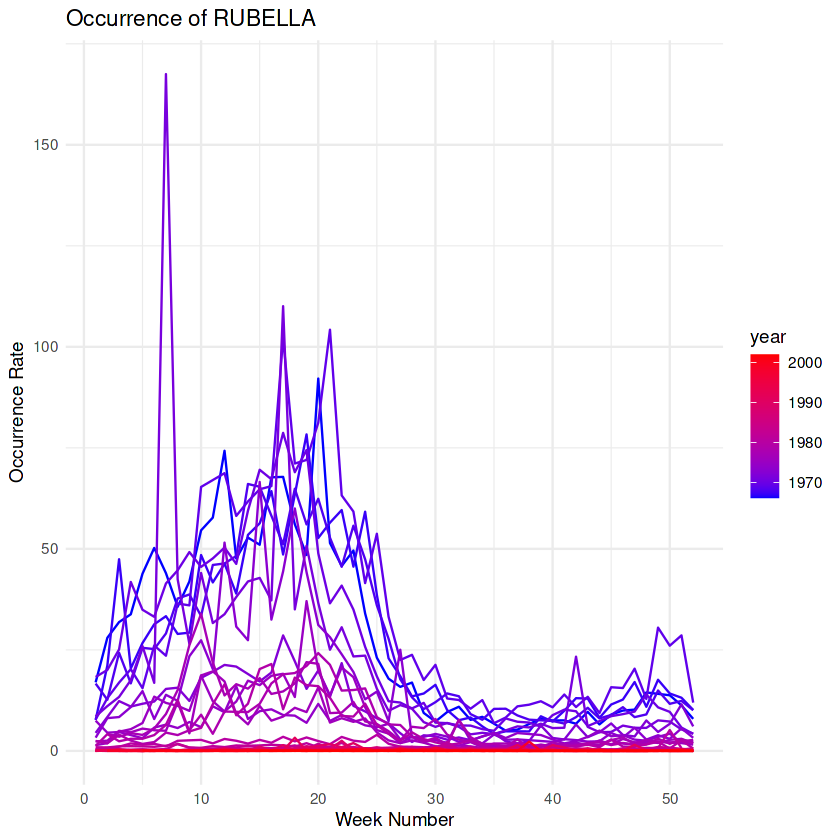

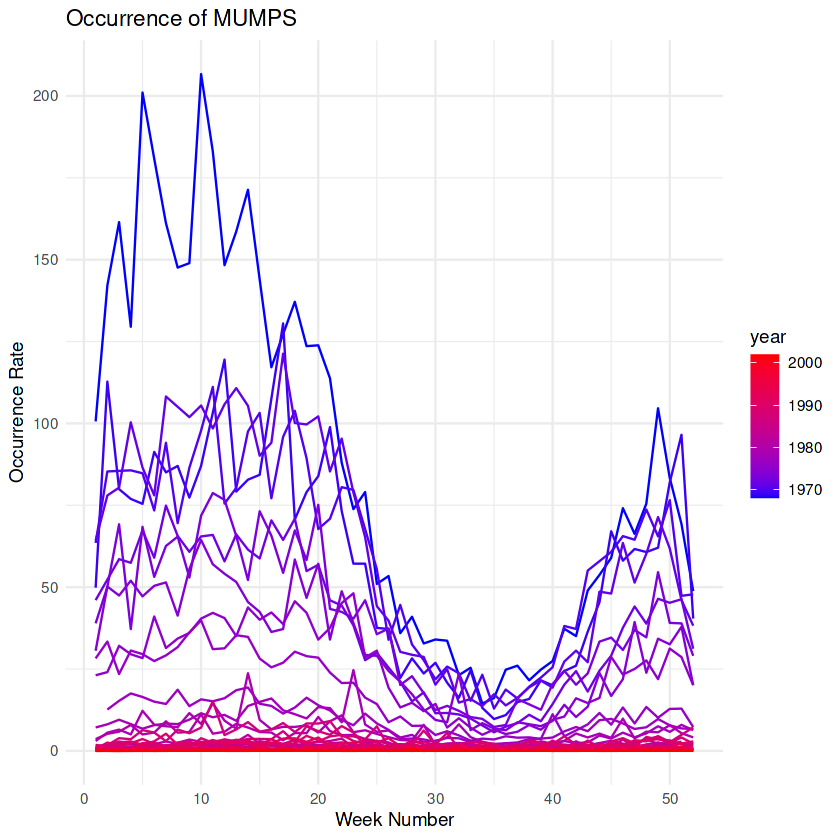

In [11]:
toPlot <- aggregate(incidence_per_capita ~ week + disease + weekNb + year, data = data, FUN = sum)

# Sort by 'week'
toPlot <- toPlot[order(toPlot$week), ]

# Create a list of unique diseases
unique_diseases <- unique(toPlot$disease)

# Define a color palette for diseases
color_palette <- rainbow(length(unique_diseases))

# Define the specific years for which you want to add data point markers
year1 <- 2020
year2 <- 2021

# Create and display individual line plots for each disease
for (i in unique_diseases) {
  data_subset <- toPlot[toPlot$disease == i, ]
  
  # Filter data points for specific years to add data point markers
  data_with_markers <- data_subset[data_subset$year %in% c(year1, year2), ]
  
  p <- ggplot(data_subset, aes(x = weekNb, y = incidence_per_capita, group = year, colour = year)) +
    geom_line() +
    geom_point(data = data_with_markers) +  # Add data point markers for specific years
    scale_colour_gradient(low = "blue", high = "red") +
    ggtitle(paste("Occurrence of", i)) +
    labs(x = "Week Number", y = "Occurrence Rate") +
    theme_minimal()
    
  # Display the plot for the current disease
  print(p)
}

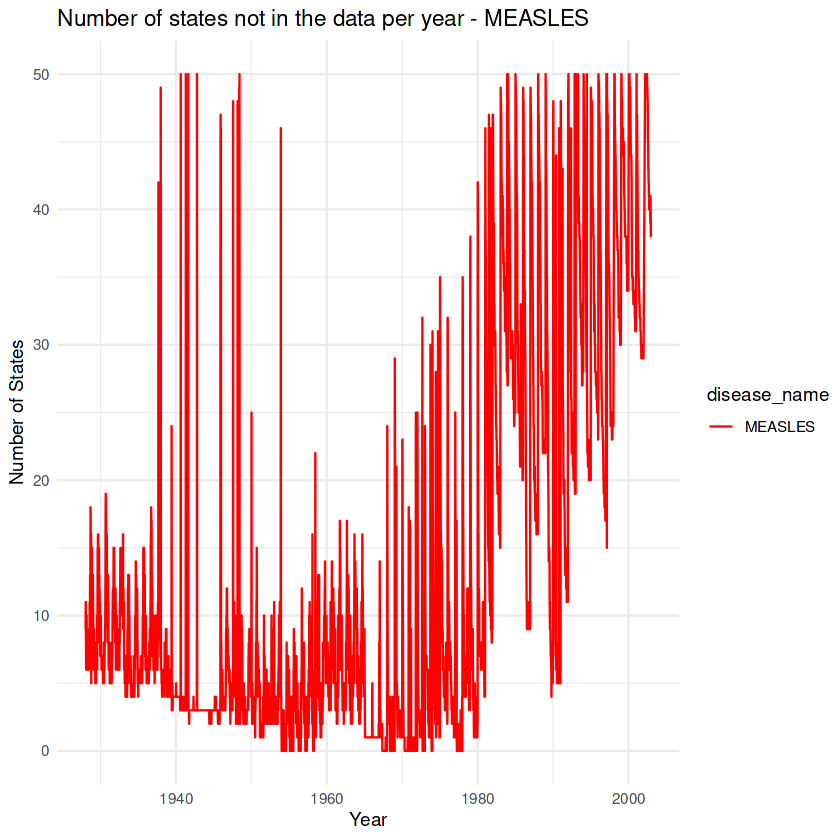

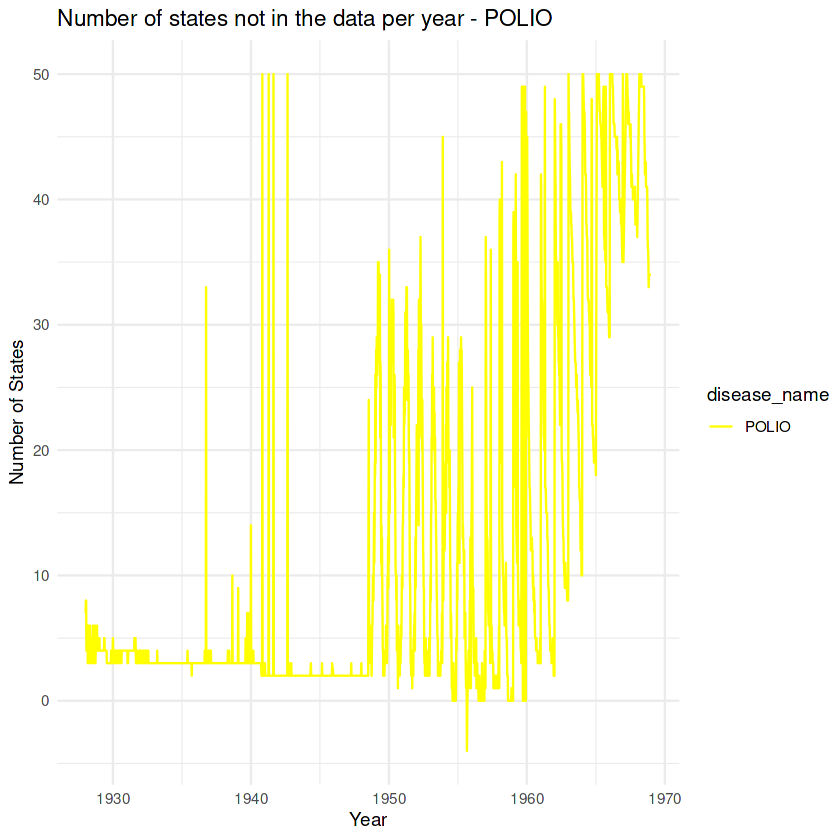

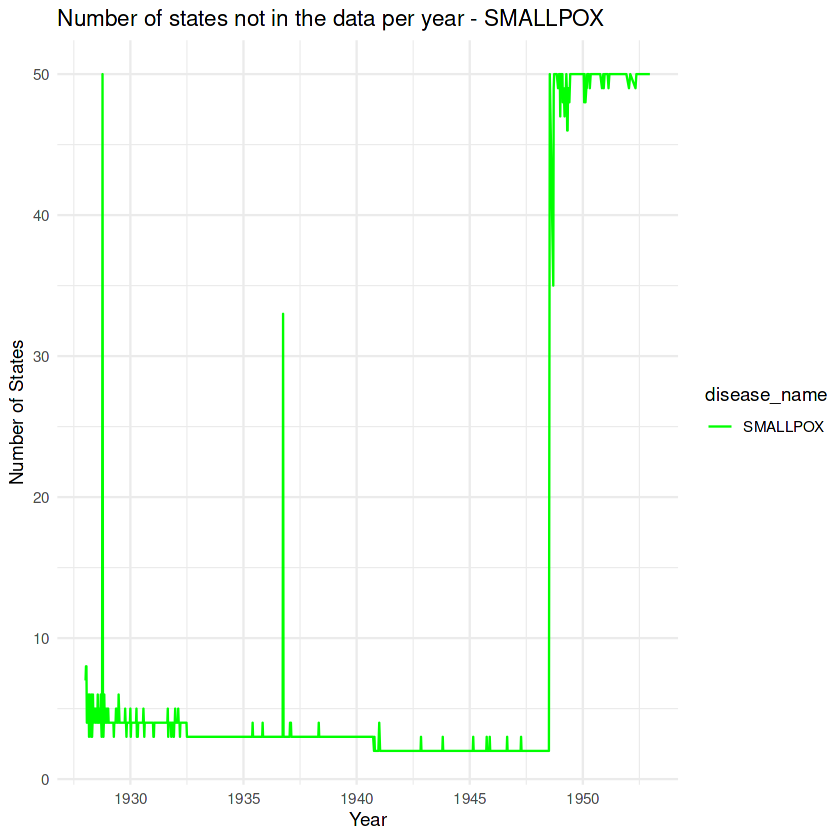

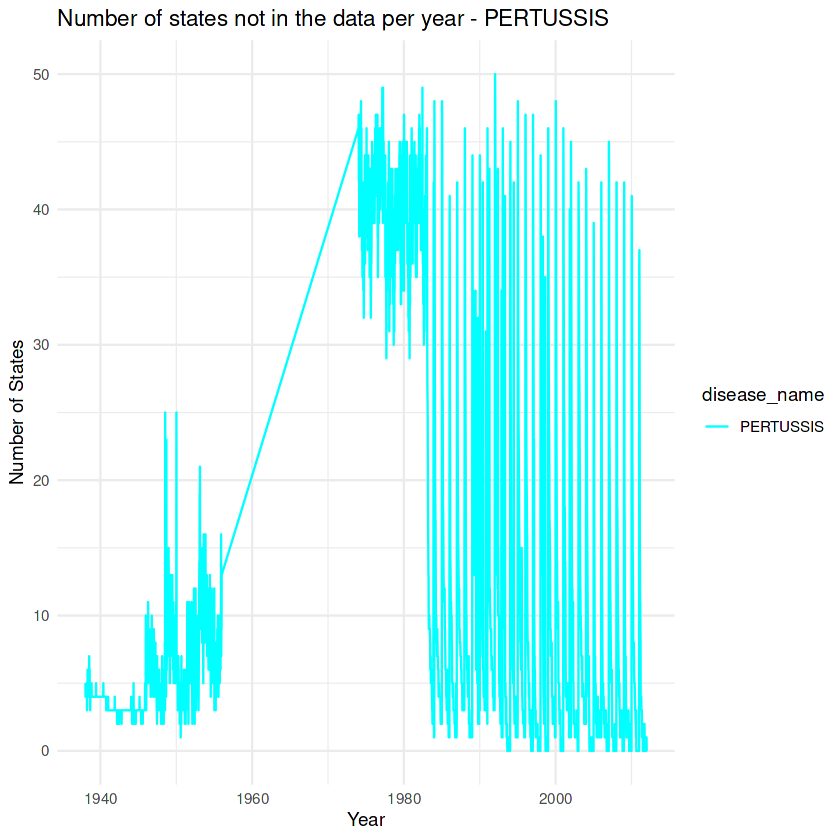

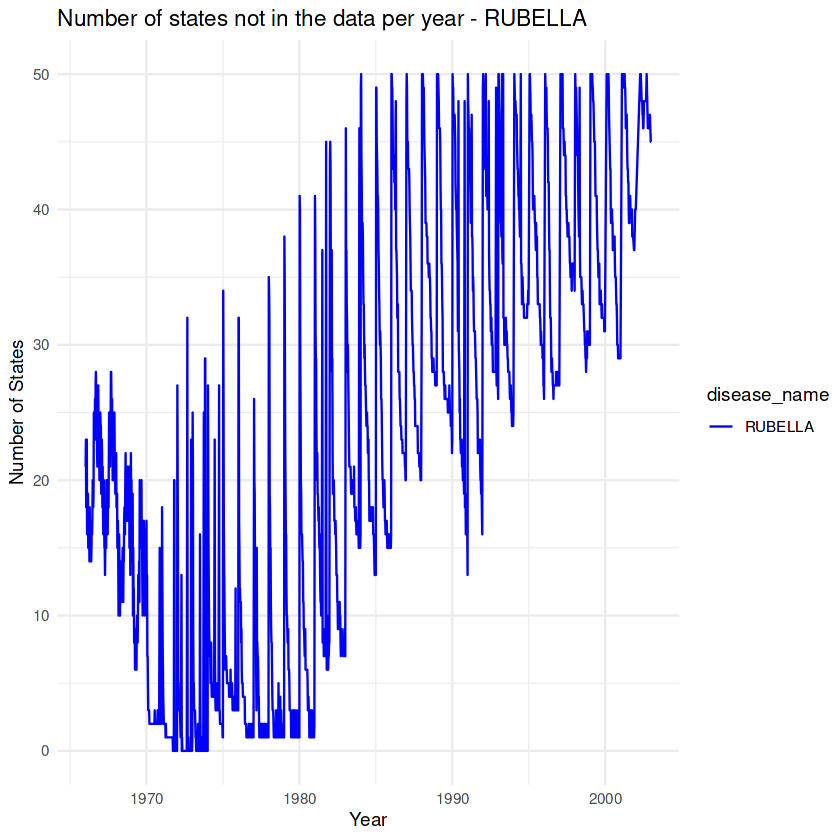

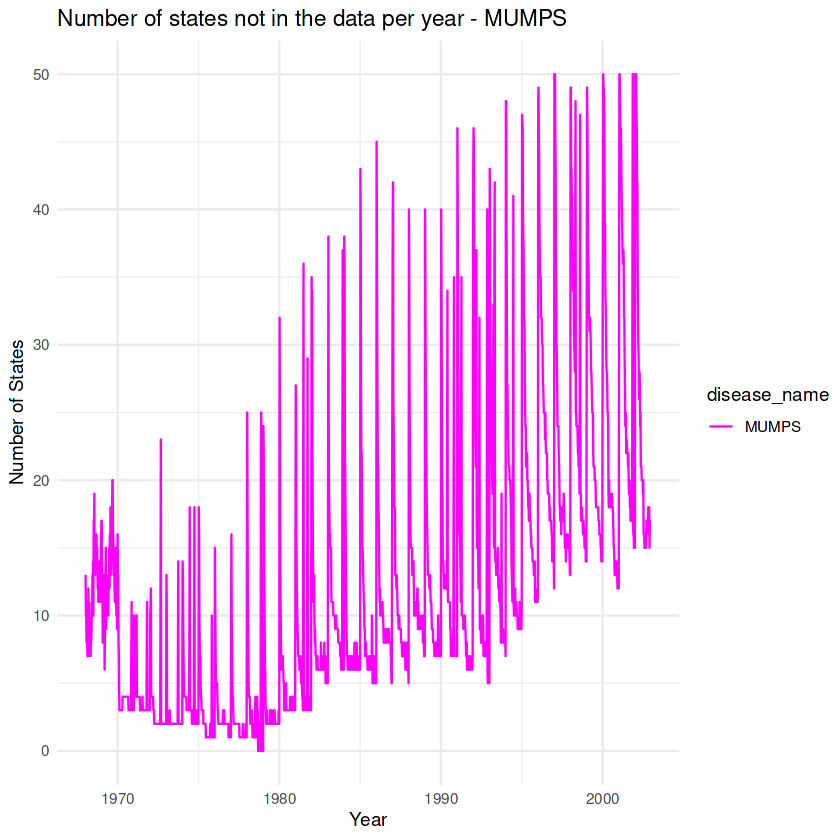

In [12]:
toPlot <- aggregate(state_name ~ disease + tempsContinue + state_name, data = data, FUN = length)
toPlot$state_name <- 51 - toPlot$state_name
toPlot <- toPlot[order(toPlot$tempsContinue), ]

unique_diseases <- unique(toPlot$disease)
custom_colors <- rainbow(length(unique_diseases))

for (i in 1:length(unique_diseases)) {
  disease_name <- unique_diseases[i]
  data_subset <- toPlot[toPlot$disease == disease_name, ]
  
  p <- ggplot(data_subset, aes(x = tempsContinue, y = state_name, color = disease_name, group = disease_name)) +
    geom_line() +  # Use a line chart
    scale_color_manual(values = custom_colors[i]) +  # Assign custom color to the disease
    ggtitle(paste("Number of states not in the data per year -", disease_name)) +
    labs(x = "Year", y = "Number of States") +  # Axis labels
    theme_minimal()  # A minimalistic theme
    
  print(p)
}

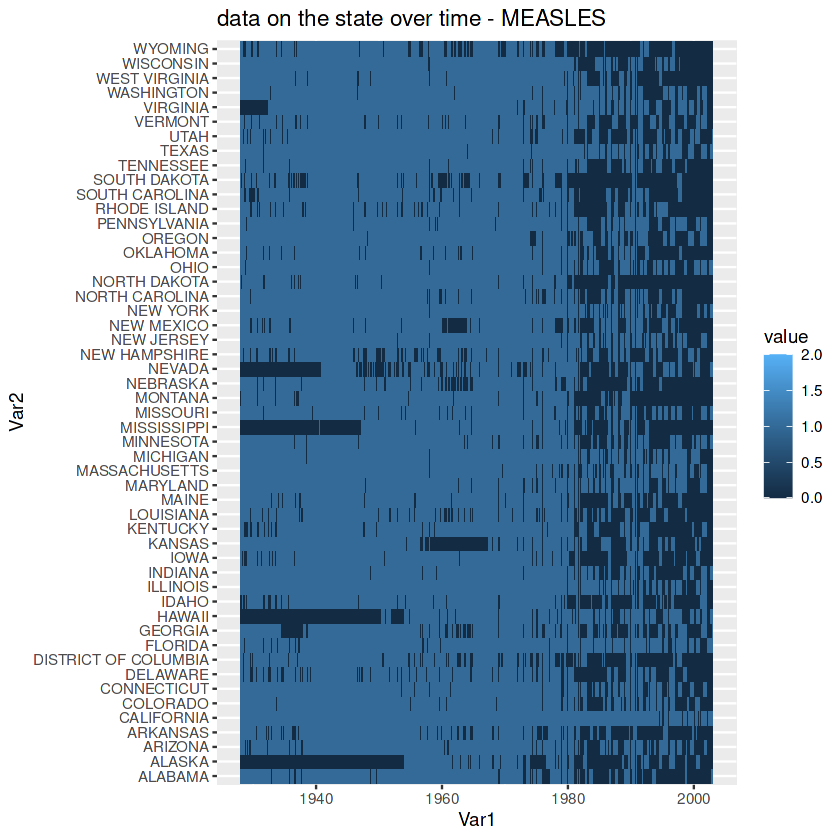

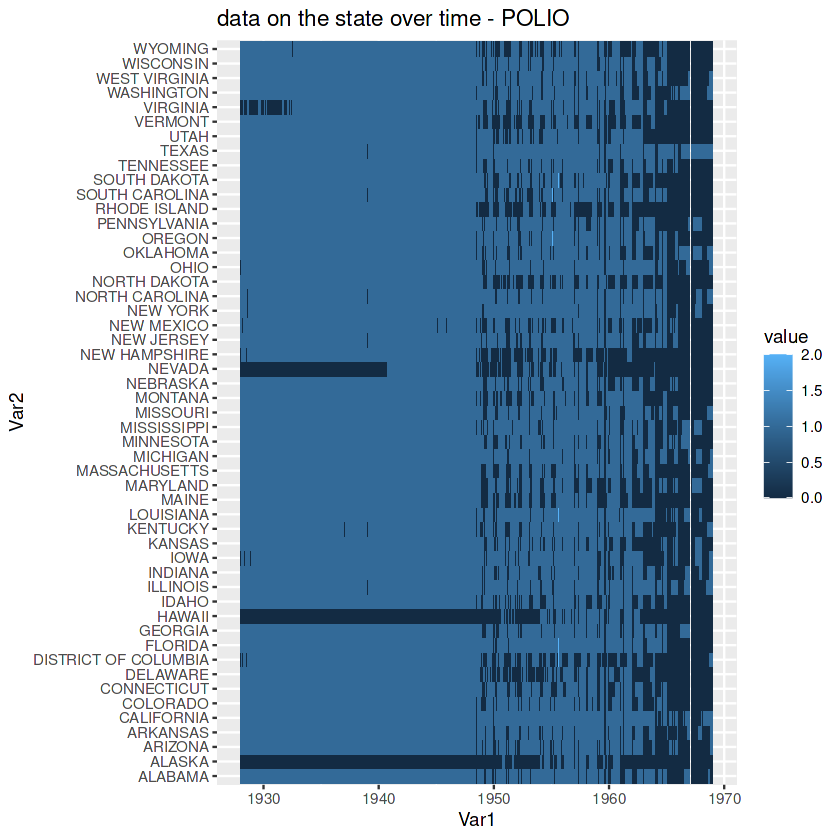

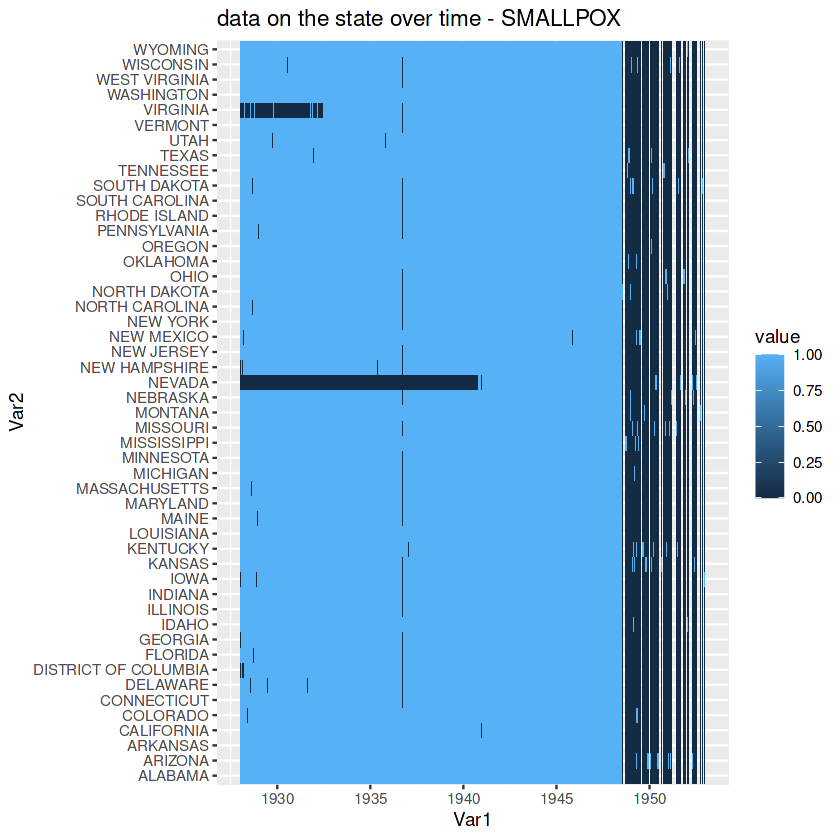

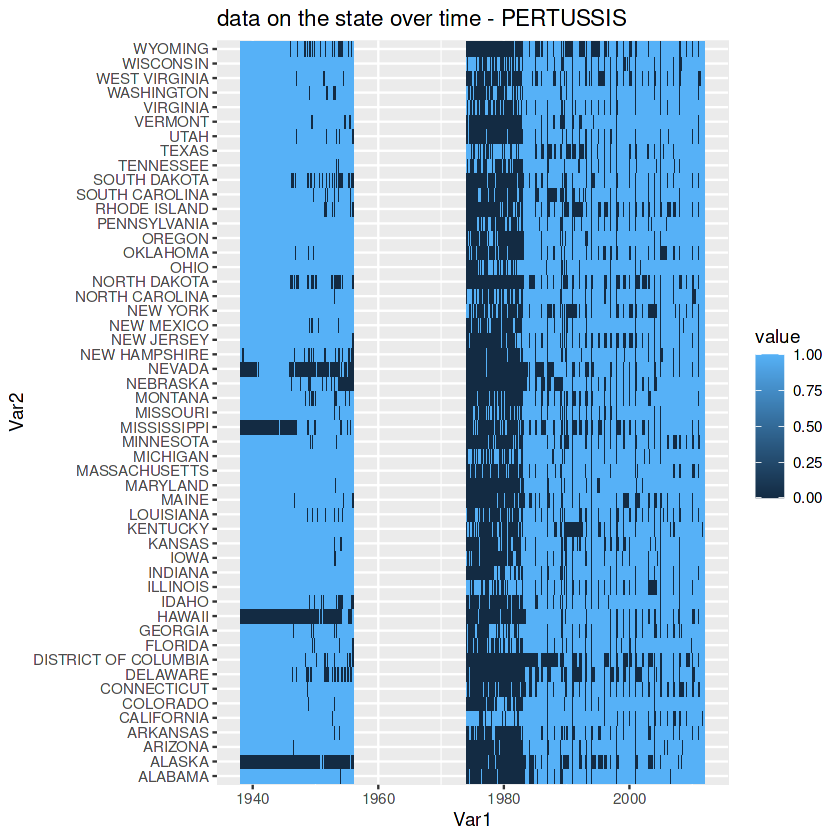

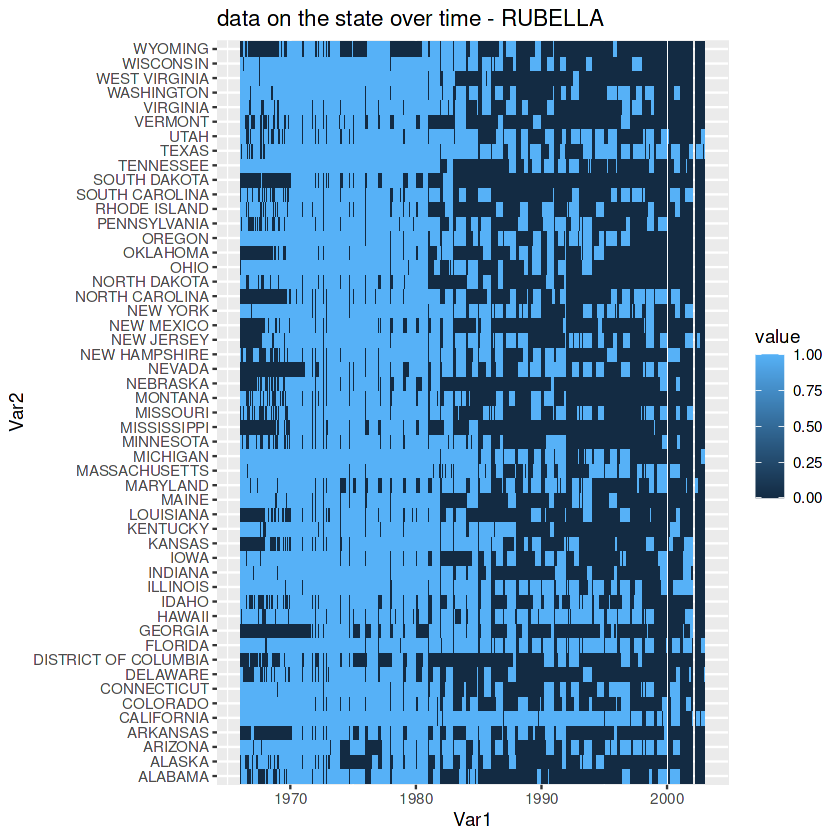

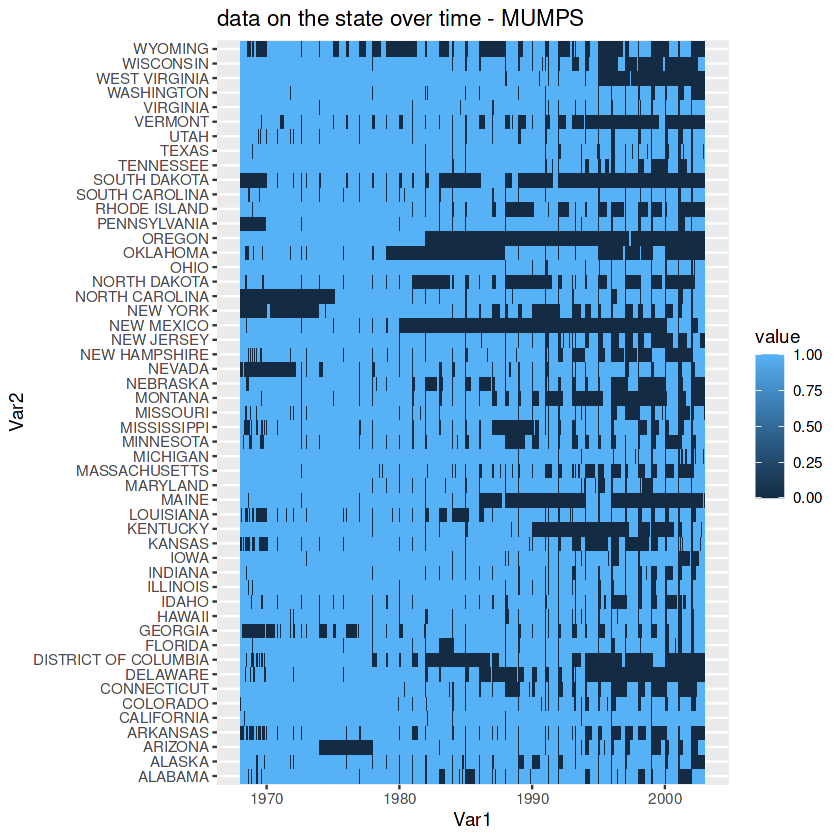

In [13]:
library(reshape2)
for(i in unique(toPlot$disease)) {
  res<-melt(table(data$tempsContinue[data$disease==i], data$state_name[data$disease==i]))
  print(ggplot(data = res, aes(x=Var1, y=Var2, fill=value)) + geom_tile()+ggtitle(paste("data on the state over time -", i)))
}

##Let's see the global repartition of the cases
First the boxplots will give us the scale to use and then we'll see over time and states

Warning message:
“Removed 222471 rows containing non-finite values (`stat_boxplot()`).”


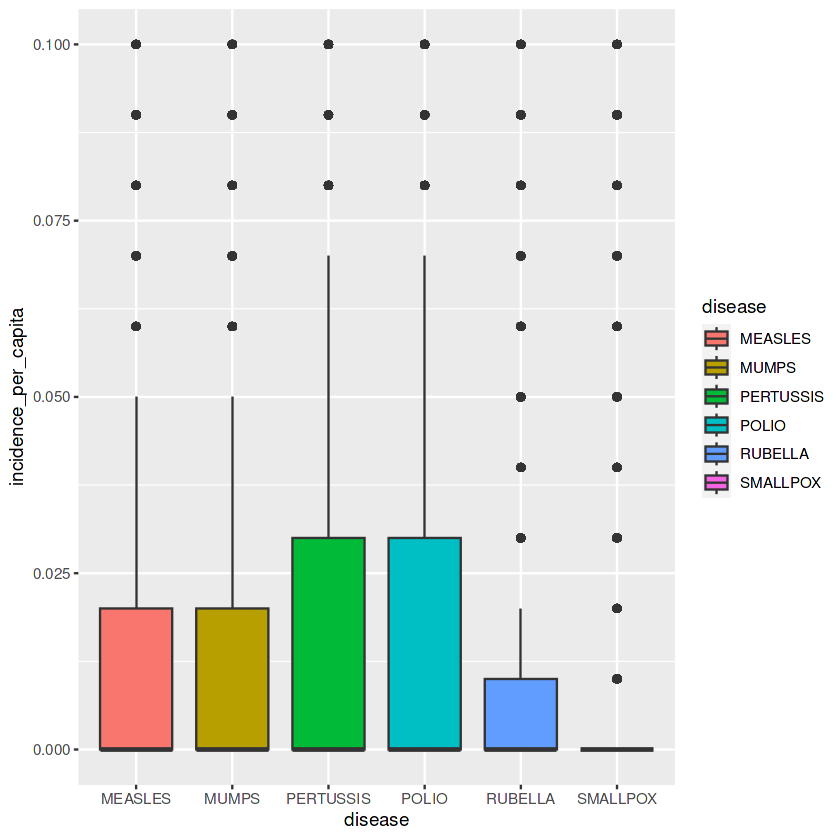

In [14]:
toPlot<-aggregate(incidence_per_capita ~ tempsContinue + state_name + disease, data=data, FUN =sum)
ggplot(data=toPlot, aes(x=disease, y=incidence_per_capita, fill=disease))+geom_boxplot()+ylim(0,0.1)